Requisitos previos


In [ ]:
#pip install pycaret

In [ ]:
#Comenzamos importando las librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, auc, precision_recall_curve, average_precision_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
import xgboost as xgb
from sklearn.metrics import classification_report

from pycaret.classification import *

from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


In [ ]:
#Leemos el dataset
df = pd.read_csv('/content/hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


Análisis de datos exploratorio

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
#Miramos los valores nulos por columna
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
#Gestión de nulos:

#Voy a 3 nuevos features, uno será si la reserva viene a través de un agente y el otro si es una empresa o no, el tercero es el número total de noches

df['contains_agent'] = df['agent'].apply(lambda x: 1 if x > 0 else 0)
df['is_company'] = df['company'].apply(lambda x: 1 if x > 0 else 0)

#Eliminamos las originales

df = df.drop(['company'], axis = 1)
df = df.drop(['agent'], axis = 1)

#Relleno Childen con 0
df['children'].fillna(0, inplace=True)

#Los países nulos los ponemos como desconocidos
df['country'].fillna("UNK", inplace=True)

#Comprobamos que no quedan nulos
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [ ]:
#Eliminamos las reservas con 0 adultos, 0 niños y 0 bebés
df = df[(df['adults'] != 0) | (df['children'] != 0) | (df['babies'] != 0)]

#Comprobamos si hay duplicados filas duplicadas
print("Se han eliminado" ,df.duplicated().sum(), "Filas")

#Los eliminamos
df = df.drop_duplicates()

Se han eliminado 31997 Filas


In [ ]:
#Creación de nuevos features
#Saber si una reserva es famila o no

df['is_family'] = 0
df.loc[((df['adults'] > 0) & (df['children'] > 0)) | ((df['adults'] > 0) & (df['babies'] > 0)), 'is_family'] = 1

#Nº total de clientes
df['total_people'] = df['adults'] + df['children'] + df['babies']
df.drop(['adults', 'children', 'babies'], axis= 1, inplace=True)

#Nº total de noches
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df.drop(['stays_in_weekend_nights', 'stays_in_week_nights'], axis= 1, inplace=True)

In [ ]:
month_map = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

df['arrival_date_month'] = df['arrival_date_month'].map(month_map)

Comenzamos con los gráficos

In [ ]:
cmap = plt.cm.get_cmap('Pastel1')

pastel_color = cmap(0)

# Select two colors from the colormap
color1 = cmap(0.2)  # Example: a lighter pastel color
color2 = cmap(0.8)  # Example: a darker pastel color


# Create a list of colors for the bars
bar_colors = [color1] * 3 + [color2] * 7

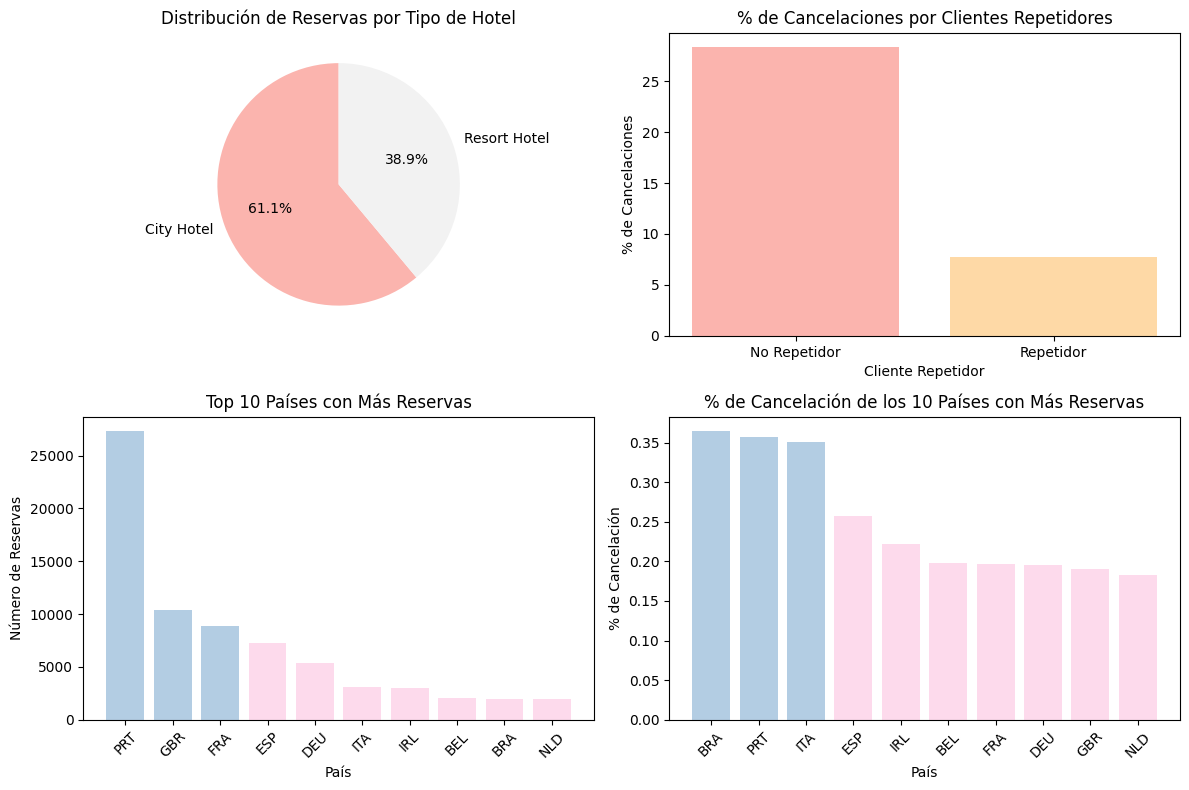

In [ ]:
# Crear una figura con 2 filas y 2 columnas de subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))




# Gráfico de pastel con el tipo de hotel
hotel_counts = df['hotel'].value_counts()
axes[0, 0].pie(hotel_counts, labels=hotel_counts.index, autopct='%1.1f%%', startangle=90, colors=cmap(np.linspace(0, 1, len(hotel_counts))))
axes[0, 0].set_title('Distribución de Reservas por Tipo de Hotel')

# Gráfico de barras de % de cancelaciones por repetidor o no
cancel_rate = df.groupby('is_repeated_guest')['is_canceled'].mean() * 100
axes[0, 1].bar(cancel_rate.index, cancel_rate.values, color=cmap([0, 0.5])) # Ajusta los valores de 0 y 0.5 para cambiar los colores específicos
axes[0, 1].set_xlabel('Cliente Repetidor')
axes[0, 1].set_ylabel('% de Cancelaciones')
axes[0, 1].set_title('% de Cancelaciones por Clientes Repetidores')
axes[0, 1].set_xticks([0, 1])
axes[0, 1].set_xticklabels(['No Repetidor', 'Repetidor'])

# Gráfico de barras con los países que más reservas tienen
country_counts = df['country'].value_counts().head(10)
axes[1, 0].bar(country_counts.index, country_counts.values, color=bar_colors)
axes[1, 0].set_xlabel('País')
axes[1, 0].set_ylabel('Número de Reservas')
axes[1, 0].set_title('Top 10 Países con Más Reservas')
axes[1, 0].tick_params(axis='x', rotation=45)

# Gráfico de barras con % de cancelación de los 10 países con más reservas

#Cancelaciones en % por país:

# Agrupamos por tipo de hotel y contamos las reservaciones
hotel_counts = df.groupby('country').size()

# Calculamos el peso de cada tipo de hotel
hotel_weights = hotel_counts / hotel_counts.sum()

# Agrupamos por tipo de hotel y calculamos el porcentaje de cancelaciones
cancel_rate = df.groupby('country')['is_canceled'].mean()

# Combinamos los resultados en un solo dataframe
result_country = pd.DataFrame({'Peso': hotel_weights, 'Tasa de Cancelación': cancel_rate}).sort_values(by='Peso', ascending=False).head(10)
top_10 = result_country.sort_values('Tasa de Cancelación', ascending=False)


# Gráfico de barras con % de cancelación de los 10 países con más reservas
axes[1, 1].bar(top_10.index, top_10['Tasa de Cancelación'], color=bar_colors)
axes[1, 1].set_xlabel('País')
axes[1, 1].set_ylabel('% de Cancelación')
axes[1, 1].set_title('% de Cancelación de los 10 Países con Más Reservas')
axes[1, 1].tick_params(axis='x', rotation=45)

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

<ipython-input-78-1b018d3ff064>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_canceled', y='lead_time', data=df, ax=axes[0], palette=cmap(np.linspace(0, 1, 2)))
<ipython-input-78-1b018d3ff064>:5: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.boxplot(x='is_canceled', y='lead_time', data=df, ax=axes[0], palette=cmap(np.linspace(0, 1, 2)))
<ipython-input-78-1b018d3ff064>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_canceled', y='adr', data=df, ax=axes[1], palette=cmap(np.linspace(0, 1, 2)))
<ipython-input-78-1b018d3ff064>:11: UserWarning: Numpy array is not a supported type fo

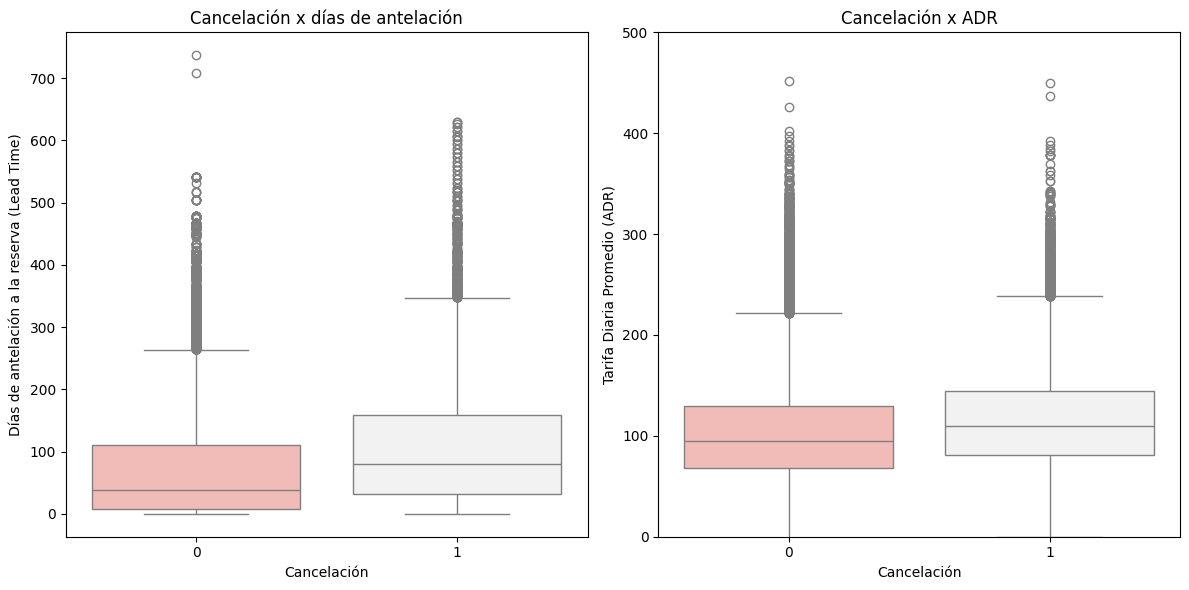

In [ ]:
# Crear una figura con 2 fila y 2 columnas de subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot x is_canceled y lead time
sns.boxplot(x='is_canceled', y='lead_time', data=df, ax=axes[0], palette=cmap(np.linspace(0, 1, 2)))
axes[0].set_xlabel('Cancelación')
axes[0].set_ylabel('Días de antelación a la reserva (Lead Time)')
axes[0].set_title('Cancelación x días de antelación')

# Boxplot x is_canceled y adr
sns.boxplot(x='is_canceled', y='adr', data=df, ax=axes[1], palette=cmap(np.linspace(0, 1, 2)))
axes[1].set_xlabel('Cancelación')
axes[1].set_ylabel('Tarifa Diaria Promedio (ADR)')
axes[1].set_title('Cancelación x ADR')
plt.ylim(0, 500)

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

<ipython-input-83-5f80156b084c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_canceled', y='total_nights', data=df, palette=cmap(np.linspace(0, 1, 2)), ax=ax) # Pass the axes to the sns.boxplot function
<ipython-input-83-5f80156b084c>:3: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.boxplot(x='is_canceled', y='total_nights', data=df, palette=cmap(np.linspace(0, 1, 2)), ax=ax) # Pass the axes to the sns.boxplot function


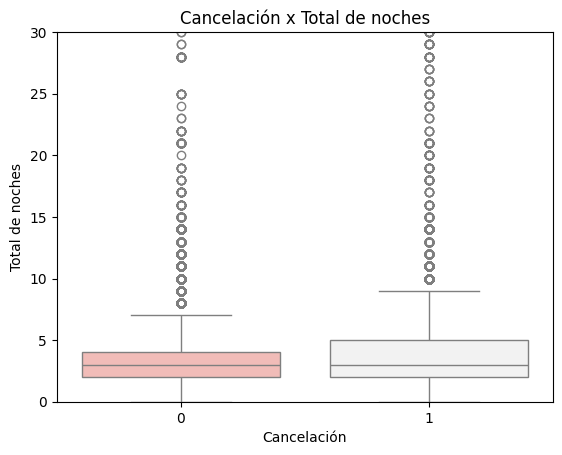

In [ ]:
# Boxplot x is_canceled y total de noches
fig, ax = plt.subplots() # Create a figure and a single axes
sns.boxplot(x='is_canceled', y='total_nights', data=df, palette=cmap(np.linspace(0, 1, 2)), ax=ax) # Pass the axes to the sns.boxplot function
ax.set_xlabel('Cancelación') # Now use ax to set labels and title
ax.set_ylabel('Total de noches')
ax.set_title('Cancelación x Total de noches')
plt.ylim(0, 30)
plt.show()

<ipython-input-87-a1d67675eb98>:9: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.countplot(x = "market_segment", hue = 'is_canceled', data = df, order=segment_counts.index, palette=colors)


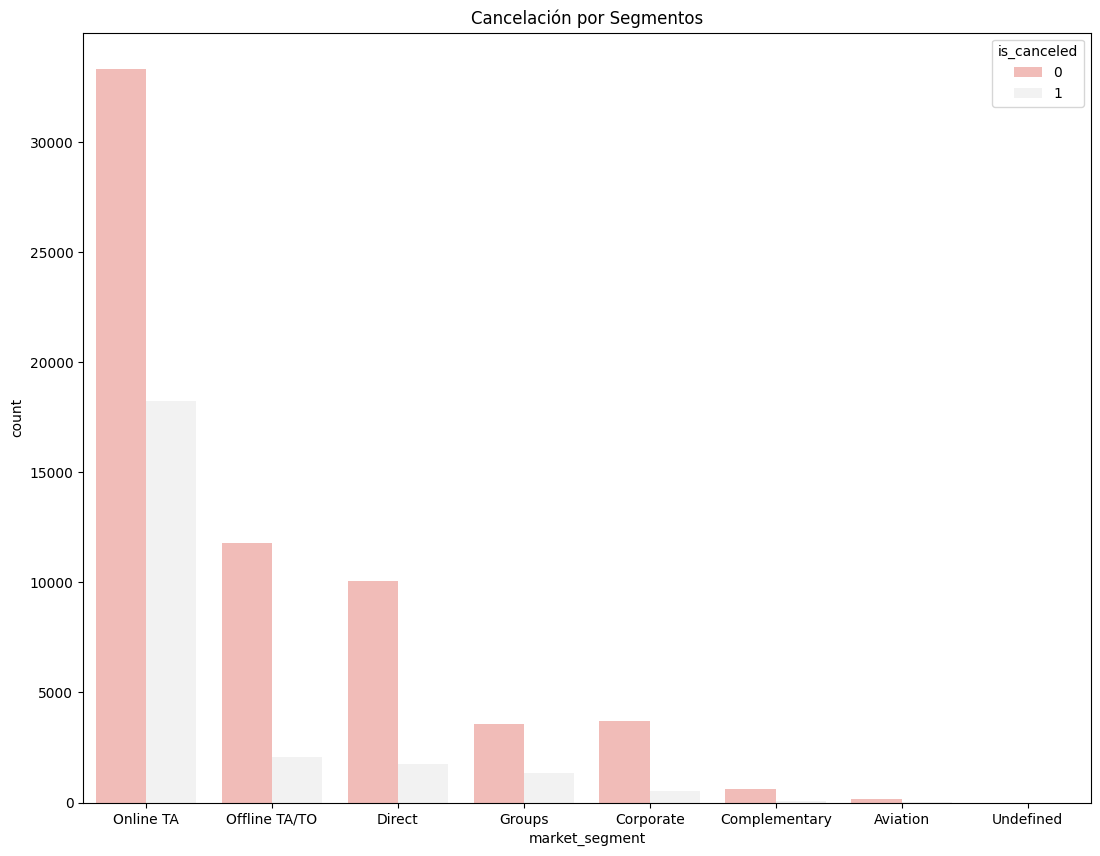

In [ ]:
segment_counts = df['market_segment'].value_counts()

plt.figure(figsize = (13,10))
plt.title("Cancelación por Segmentos")

# Obtener la paleta de colores
colors = cmap(np.linspace(0, 1, 2))  # Extraer 2 colores para 'is_canceled' (0 y 1)

sns.countplot(x = "market_segment", hue = 'is_canceled', data = df, order=segment_counts.index, palette=colors)
plt.show()

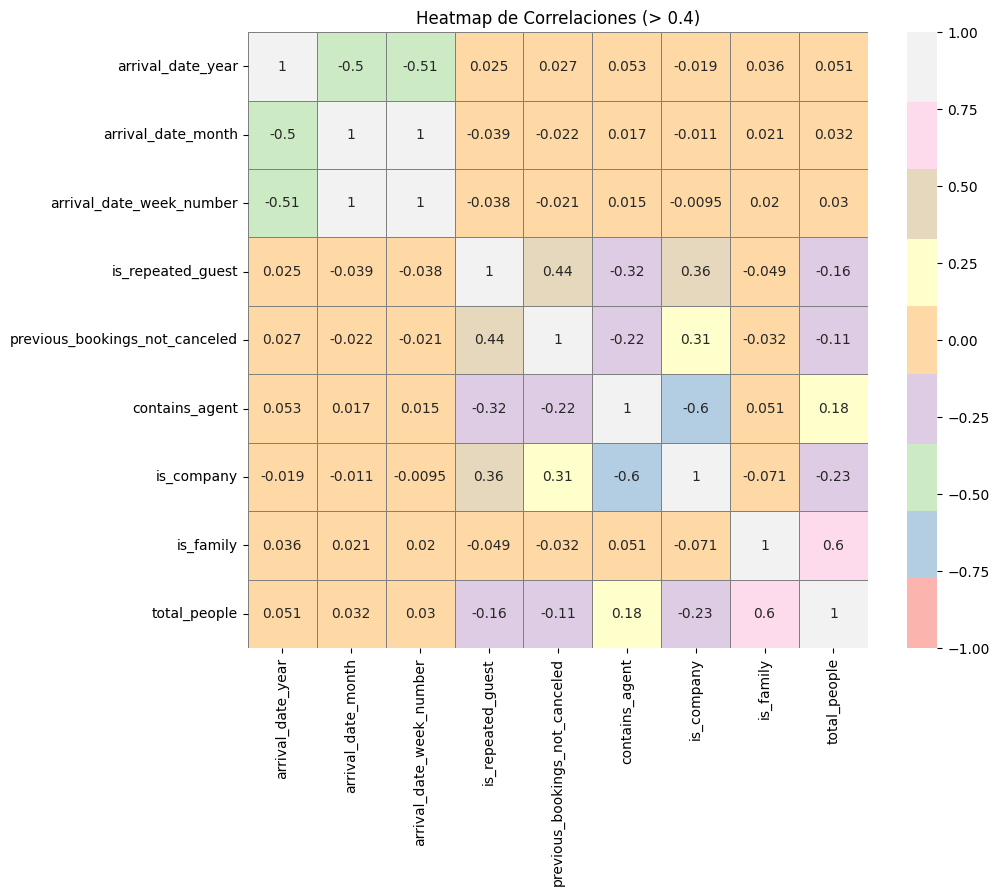

In [ ]:
numerical_columns = df.select_dtypes(include=['float', 'int']).columns

correlation_matrix = df[numerical_columns].corr()
threshold = 0.4

abs_corr_matrix = correlation_matrix.abs()

# Filtrar las correlaciones que sean mayores que 0.3 y menores que 1 (para no incluir la diagonal)
filtered_corr = abs_corr_matrix[(abs_corr_matrix > 0.40) & (abs_corr_matrix < 1)]

# Obtener las variables que tienen al menos una correlación mayor que 0.4
variables_to_keep = filtered_corr.columns[filtered_corr.notna().any()].tolist()

# Filtrar el DataFrame para mantener solo estas variables
filtered_df = df[variables_to_keep]

correlation_matrix_filter = filtered_df.corr()

# Configurar el tamaño del heatmap
plt.figure(figsize=(10, 8))

# Crear el heatmap
sns.heatmap(correlation_matrix_filter, annot=True, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=0.5, linecolor='gray')

# Mostrar el heatmap
plt.title('Heatmap de Correlaciones (> 0.4)')
plt.show()

In [ ]:
#Teniendo en cuenta estas correlaciones voy a eliminar las columnas de arrival date week number y stays in weekend nights

df.drop(columns = ['arrival_date_week_number'], axis = 1, inplace = True)

In [ ]:
df.shape

(87213, 29)

Ajustes pre-modelado

In [ ]:
# Count bookings for each country
country_counts = df['country'].value_counts()

# Get top 10 countries
top_10_countries = country_counts.head(10).index.tolist()

# Categorize countries
df['country_grouped'] = df['country'].apply(lambda x: x if x in top_10_countries else 'Others')

df = df.drop(['country'], axis = 1)

In [ ]:
#Elimino la columna de reservatios_status_date porque es la fecha completa del estado de la reserva y no necesito ese dato
df = df.drop(['reservation_status_date'], axis = 1)

In [ ]:
#El feature de reservation_status ya contiene si la reserva está cancelada, por lo tanto la eliminamos
df = df.drop(['reservation_status'], axis = 1)

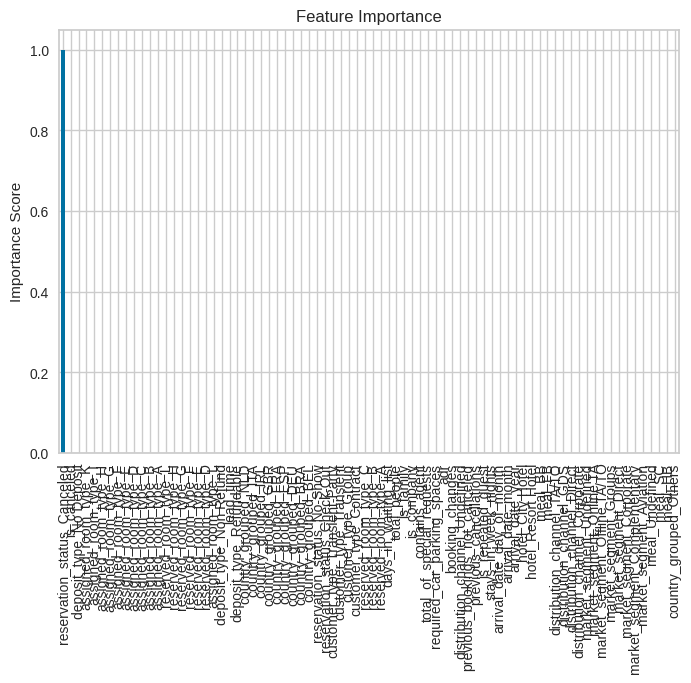

Comenzamos con un modelo base, en este caso un xgboost

In [ ]:
df1 = df.copy()

In [ ]:
df_dum = pd.get_dummies(data = df1, dtype='int')

In [ ]:
model_setup = setup(data = df_dum, target = 'is_canceled', session_id = 123)

,Description,Value
0,Session id,123
1,Target,is_canceled
2,Target type,Binary
3,Original data shape,"(87213, 76)"
4,Transformed data shape,"(87213, 76)"
5,Transformed train set shape,"(61049, 76)"
6,Transformed test set shape,"(26164, 76)"
7,Numeric features,75
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8418,0.8989,0.6264,0.7571,0.6855,0.5811,0.5858,10.7380
xgboost,Extreme Gradient Boosting,0.8404,0.9049,0.6480,0.7399,0.6908,0.5839,0.5863,1.8120
lightgbm,Light Gradient Boosting Machine,0.8376,0.9014,0.6285,0.7422,0.6805,0.5727,0.5763,6.0530
et,Extra Trees Classifier,0.8333,0.8866,0.6266,0.7298,0.6742,0.5631,0.5661,14.8790
gbc,Gradient Boosting Classifier,0.8196,0.8767,0.5585,0.7231,0.6301,0.5134,0.5210,12.7180
ada,Ada Boost Classifier,0.8050,0.8571,0.5050,0.7028,0.5876,0.4644,0.4753,3.5030
dt,Decision Tree Classifier,0.7852,0.7358,0.6207,0.6076,0.6140,0.4653,0.4653,0.8180
lr,Logistic Regression,0.7848,0.8279,0.4487,0.6603,0.5340,0.4008,0.4136,13.4860
lda,Linear Discriminant Analysis,0.7846,0.8297,0.4241,0.6724,0.5201,0.3903,0.4076,0.8630
ridge,Ridge Classifier,0.7822,0.8297,0.3702,0.6963,0.4834,0.3614,0.3904,0.2720


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
X = df_dum.drop(['is_canceled'], axis = 1)
y = df_dum['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [ ]:
model_base = xgb.XGBClassifier(n_estimators=200)
model_base.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, objective='binary:logistic', ...)

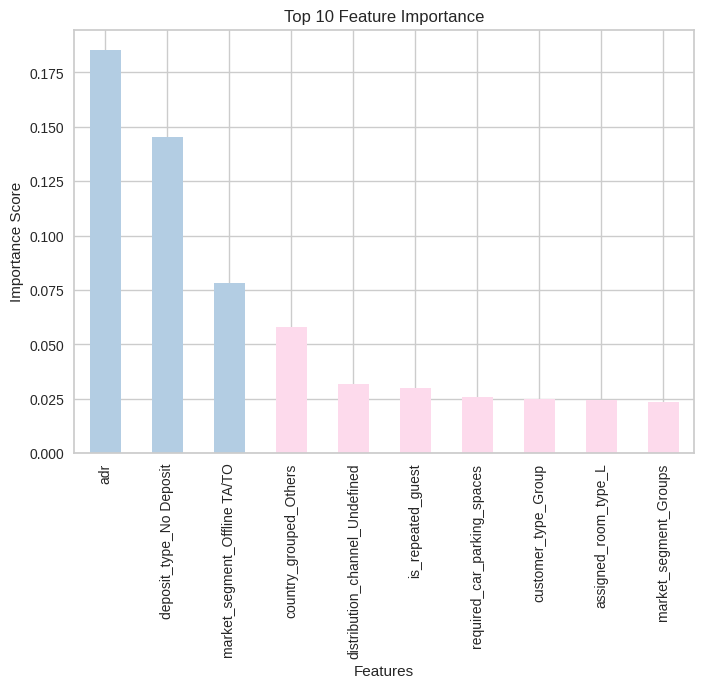

In [ ]:
# Get feature importances
importances = model_base.feature_importances_

# Create a Series for visualization
feature_importances = pd.Series(importances, index=df_dum.columns[:-1])  # Exclude target column

# Sort and select top 10
top_10_features = feature_importances.sort_values(ascending=False).head(10)

# Plot top 10 features
top_10_features.plot(kind='bar', color=bar_colors)
plt.xlabel('Features')
plt.title('Top 10 Feature Importance')
plt.ylabel('Importance Score')
plt.show()

In [ ]:
y_pred = model_base.predict(X_test)

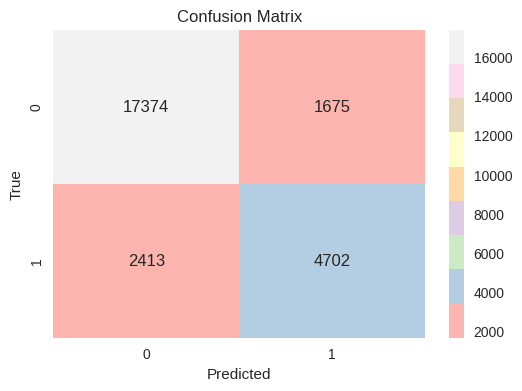

              precision    recall  f1-score   support

           0       0.88      0.91      0.89     19049
           1       0.74      0.66      0.70      7115

    accuracy                           0.84     26164
   macro avg       0.81      0.79      0.80     26164
weighted avg       0.84      0.84      0.84     26164



In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))

# Create the heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Pastel1')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the report
print(report)

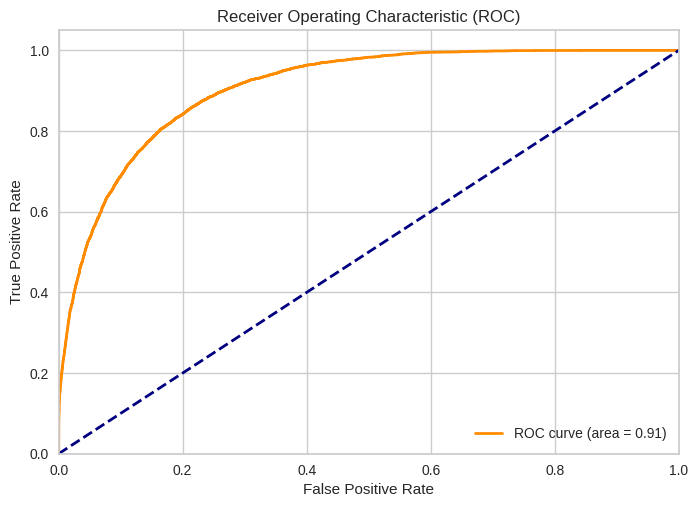

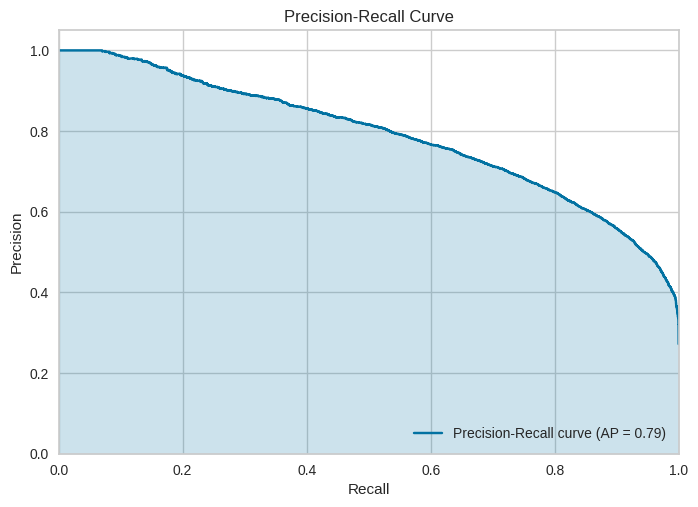

In [ ]:
# Predict probabilities for the positive class
y_probs = model_base.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_probs)
average_precision = average_precision_score(y_test, y_probs)

plt.figure()
plt.step(recall, precision, color='b', where='post', label='Precision-Recall curve (AP = %0.2f)' % average_precision)
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

[0]	validation_0-auc:0.84686	validation_0-logloss:0.51314	validation_1-auc:0.84424	validation_1-logloss:0.51067
[1]	validation_0-auc:0.85721	validation_0-logloss:0.47136	validation_1-auc:0.85492	validation_1-logloss:0.46967
[2]	validation_0-auc:0.85927	validation_0-logloss:0.44714	validation_1-auc:0.85604	validation_1-logloss:0.44653
[3]	validation_0-auc:0.86441	validation_0-logloss:0.43026	validation_1-auc:0.85983	validation_1-logloss:0.43086
[4]	validation_0-auc:0.86684	validation_0-logloss:0.41718	validation_1-auc:0.86272	validation_1-logloss:0.41813
[5]	validation_0-auc:0.87105	validation_0-logloss:0.40839	validation_1-auc:0.86583	validation_1-logloss:0.41015
[6]	validation_0-auc:0.87481	validation_0-logloss:0.40055	validation_1-auc:0.86942	validation_1-logloss:0.40267
[7]	validation_0-auc:0.87605	validation_0-logloss:0.39473	validation_1-auc:0.87069	validation_1-logloss:0.39716
[8]	validation_0-auc:0.87767	validation_0-logloss:0.39062	validation_1-auc:0.87219	validation_1-logloss:

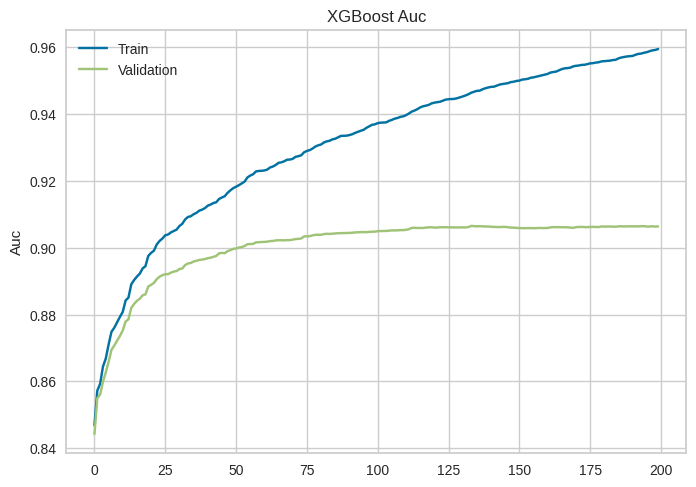

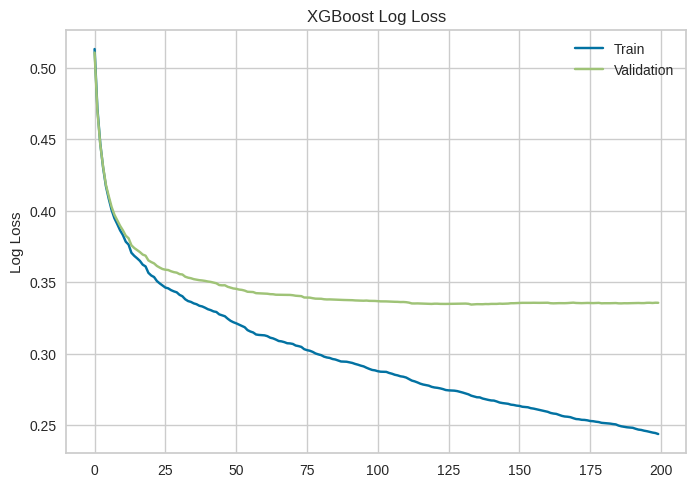

In [ ]:
# Define evaluation set
eval_set = [(X_train, y_train), (X_test, y_test)]

model_base.fit(X_train, y_train, eval_metric=["auc", "logloss"], eval_set=eval_set, verbose=True)

# Retrieve evaluation results
results = model_base.evals_result()

# Plot training and validation curves
epochs = len(results['validation_0']['auc'])
x_axis = range(0, epochs)

fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['auc'], label='Train')
ax.plot(x_axis, results['validation_1']['auc'], label='Validation')
ax.legend()
plt.ylabel('Auc')
plt.title('XGBoost Auc')
plt.show()

fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Validation')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()

In [ ]:
model_setup = setup(data = df_dum, target = 'is_canceled', session_id = 123)

,Description,Value
0,Session id,123
1,Target,is_canceled
2,Target type,Binary
3,Original data shape,"(87213, 76)"
4,Transformed data shape,"(87213, 76)"
5,Transformed train set shape,"(61049, 76)"
6,Transformed test set shape,"(26164, 76)"
7,Numeric features,75
8,Preprocess,True
9,Imputation type,simple


In [ ]:
xgboost = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8400,0.9091,0.6698,0.7274,0.6974,0.5889,0.5898
1,0.8416,0.9096,0.6395,0.7486,0.6898,0.5843,0.5876
2,0.8429,0.9065,0.6490,0.7473,0.6947,0.5896,0.5923
3,0.8352,0.9002,0.6435,0.7265,0.6824,0.5717,0.5737
4,0.8359,0.9020,0.6268,0.7374,0.6776,0.5685,0.5719
5,0.8419,0.9034,0.6536,0.7414,0.6947,0.5886,0.5908
6,0.8424,0.9051,0.6429,0.7490,0.6919,0.5868,0.5899
7,0.8408,0.9032,0.6476,0.7411,0.6912,0.5846,0.5870
8,0.8382,0.9043,0.6488,0.7325,0.6881,0.5794,0.5813


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# Calculate the positive weight
positive_weight = sum(y_train == 0) / sum(y_train == 1)

# Define the parameter grid to search, including scale_pos_weight
param_grid = {
    'n_estimators': [200],
    'learning_rate': [0.2, 0.3, 0.5],
    'max_depth': [7],
    'gamma': [0, 0.1, 0.2, 0.3],
    'min_child_weight': [1, 3, 5, 7],
    'scale_pos_weight': [positive_weight, 2]  # Add scale_pos_weight
}

# Create an XGBoost Classifier
model = xgb.XGBClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='f1')  # Use F1-score for imbalanced data
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best F1-score: ", grid_search.best_score_)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
f1 = best_model.score(X_test, y_test)
print("Test F1-score: ", f1)

Best parameters found:  {'gamma': 0.3, 'learning_rate': 0.2, 'max_depth': 7, 'min_child_weight': 7, 'n_estimators': 200, 'scale_pos_weight': 2}
Best F1-score:  0.722703888897654
Test F1-score:  0.8333205931814707


In [ ]:
# Train an XGBoost Classifier
model_tuned = xgb.XGBClassifier(n_estimators=200, learning_rate=0.2,max_depth=7, scale_pos_weight= 2, gamma=0.3, min_child_weight=7 )
model_tuned.fit(X_train, y_train)

y_pred = model_tuned.predict(X_test)

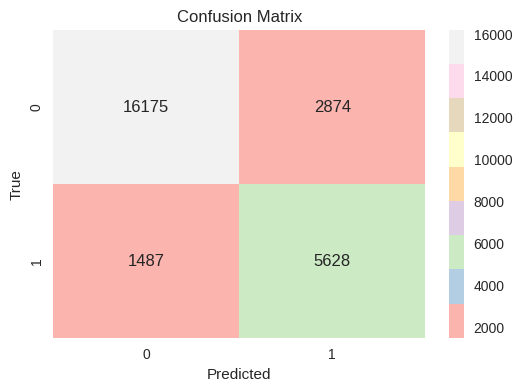

              precision    recall  f1-score   support

           0       0.92      0.85      0.88     19049
           1       0.66      0.79      0.72      7115

    accuracy                           0.83     26164
   macro avg       0.79      0.82      0.80     26164
weighted avg       0.85      0.83      0.84     26164



In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))

# Create the heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Pastel1')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the report
print(report)

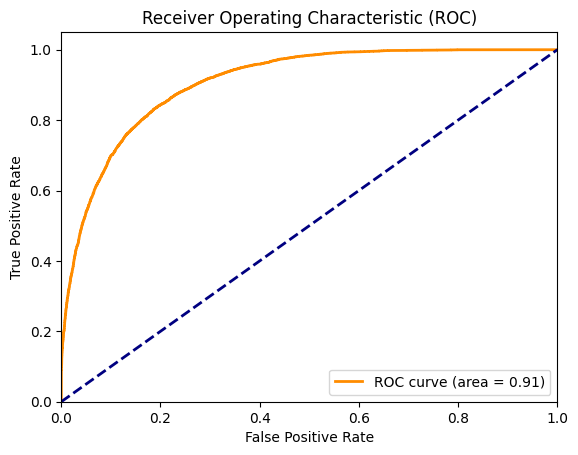

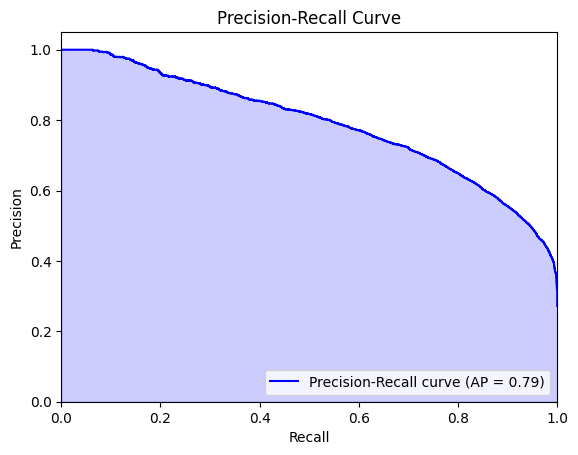

In [ ]:
# Predict probabilities for the positive class
y_probs = model_tuned.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_probs)
average_precision = average_precision_score(y_test, y_probs)

plt.figure()
plt.step(recall, precision, color='b', where='post', label='Precision-Recall curve (AP = %0.2f)' % average_precision)
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

[0]	validation_0-auc:0.85502	validation_0-logloss:0.58076	validation_1-auc:0.85067	validation_1-logloss:0.58067
[1]	validation_0-auc:0.86141	validation_0-logloss:0.53860	validation_1-auc:0.85776	validation_1-logloss:0.53902
[2]	validation_0-auc:0.86622	validation_0-logloss:0.50841	validation_1-auc:0.86210	validation_1-logloss:0.50949
[3]	validation_0-auc:0.86953	validation_0-logloss:0.48637	validation_1-auc:0.86463	validation_1-logloss:0.48823
[4]	validation_0-auc:0.87056	validation_0-logloss:0.47011	validation_1-auc:0.86622	validation_1-logloss:0.47231
[5]	validation_0-auc:0.87242	validation_0-logloss:0.45715	validation_1-auc:0.86805	validation_1-logloss:0.45992
[6]	validation_0-auc:0.87474	validation_0-logloss:0.44664	validation_1-auc:0.86977	validation_1-logloss:0.45011
[7]	validation_0-auc:0.87652	validation_0-logloss:0.43888	validation_1-auc:0.87168	validation_1-logloss:0.44252
[8]	validation_0-auc:0.87829	validation_0-logloss:0.43200	validation_1-auc:0.87291	validation_1-logloss:

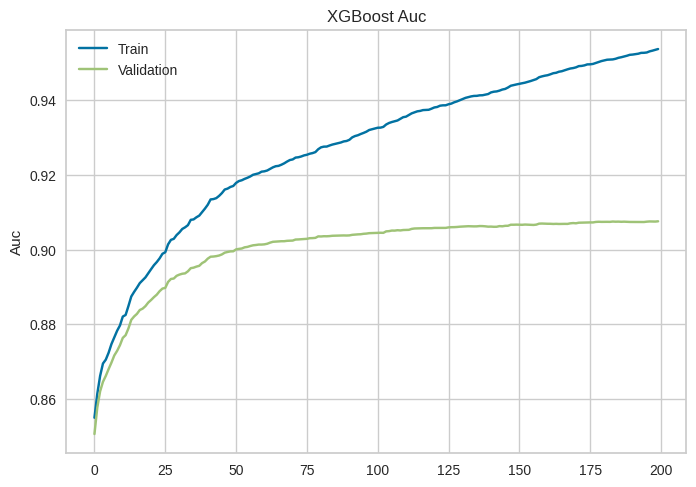

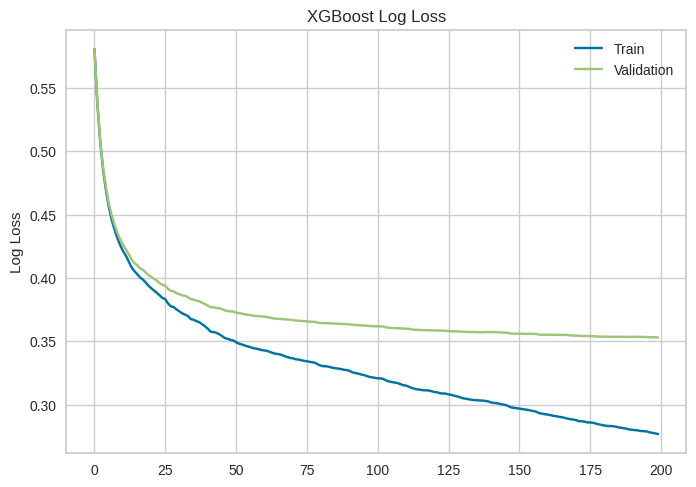

In [ ]:
# Define evaluation set
eval_set = [(X_train, y_train), (X_test, y_test)]

model_tuned.fit(X_train, y_train, eval_metric=["auc", "logloss"], eval_set=eval_set, verbose=True)

# Retrieve evaluation results
results = model_tuned.evals_result()

# Plot training and validation curves
epochs = len(results['validation_0']['auc'])
x_axis = range(0, epochs)

fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['auc'], label='Train')
ax.plot(x_axis, results['validation_1']['auc'], label='Validation')
ax.legend()
plt.ylabel('Auc')
plt.title('XGBoost Auc')
plt.show()

fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Validation')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()

Distribución de los score.

violin plot de la distribución de canceladas y no canceladas por score

In [ ]:
base_metrics = {
    'accuracy': accuracy_score(y_test, model_base.predict(X_test)),
    'precision': precision_score(y_test, model_base.predict(X_test)),
    'recall': recall_score(y_test,model_base.predict(X_test)),
    'f1_score': f1_score(y_test, model_base.predict(X_test))
}

tuned_metrics = {
    'accuracy': accuracy_score(y_test, model_tuned.predict(X_test)),
    'precision': precision_score(y_test, model_tuned.predict(X_test)),
    'recall': recall_score(y_test, model_tuned.predict(X_test)),
    'f1_score': f1_score(y_test, model_tuned.predict(X_test))
}

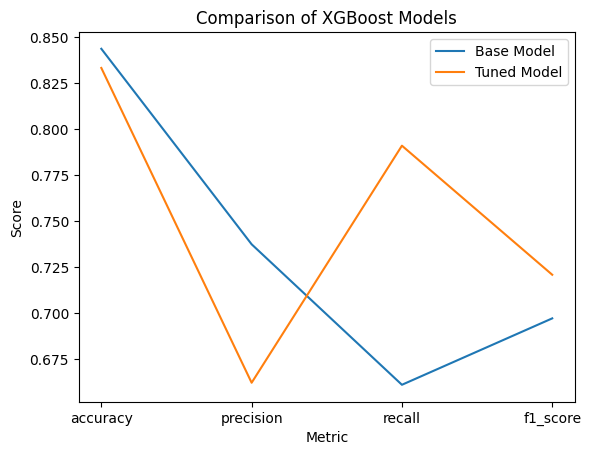

In [ ]:
metrics_df = pd.DataFrame([base_metrics, tuned_metrics], index=['Base Model', 'Tuned Model'])

metrics_df_transposed = metrics_df.transpose()

for model in metrics_df_transposed.columns:
    plt.plot(metrics_df_transposed.index, metrics_df_transposed[model], label=model)

plt.ylabel('Score')
plt.xlabel('Metric')
plt.title('Comparison of XGBoost Models')
plt.legend()
plt.show()

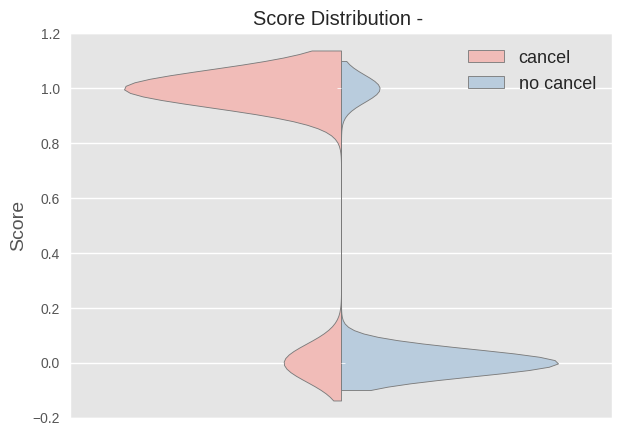

In [ ]:
predictions = model_tuned.predict(X_test)
resultados = pd.DataFrame({'pred':predictions, 'label':y_test})
resultados['label_text'] = np.where(resultados['label']==0,'no cancel', 'cancel')
resultados['dummy'] ='data'



#plot the dataset after the undersampling
plt.figure(figsize=(7, 5))
plt.style.use('ggplot')
sns.violinplot(data =resultados, x='dummy', y='pred', hue='label_text', split=True, palette='Pastel1')
plt.title(f'Score Distribution - ')
plt.xticks([])
plt.xlabel("")
plt.legend(loc='best',fontsize=13)
# Elimina los valores y el texto del eje Y
plt.ylabel('Score', fontsize=14)
# Guardar la imagen en un archivo PNG
#plt.savefig(f'distribucion_predicciones_con_label_{country}.png', bbox_inches='tight')
plt.show();

In [ ]:
# Assuming y_pred and y_true are your prediction and true label arrays
indices_failed = np.where(y_pred != y_test)[0]

print(indices_failed)

[    0     4     6 ... 26151 26160 26162]


In [ ]:
X_1 = df1.drop(['is_canceled'], axis = 1)
y_1 = df1['is_canceled']

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size = 0.30, random_state = 42)

In [ ]:
df_fallados = df1.iloc[indices_failed]
df_fallados.head()

In [ ]:
# Assuming 'xgb_model' is your trained XGBoost model, 'X_test' and 'y_test' are your test data
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
metrics_df = pd.DataFrame(columns=['Threshold', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC'])

for threshold in thresholds:
    y_pred_proba = model_tuned.predict_proba(X_test)[:, 1]  # Get predicted probabilities for positive class
    y_pred = (y_pred_proba >= threshold).astype(int)  # Apply threshold to get binary predictions

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred_proba)  # Use probabilities for AUC-ROC

    new_row = pd.DataFrame({'Threshold': [threshold], 'Accuracy': [accuracy], 'Precision': [precision],
                            'Recall': [recall], 'F1-Score': [f1], 'AUC-ROC': [auc_roc]})
    metrics_df = pd.concat([metrics_df, new_row], ignore_index=True)

print(metrics_df)

   Threshold  Accuracy  Precision    Recall  F1-Score   AUC-ROC
0        0.1  0.662857   0.445264  0.975264  0.611393  0.906484
1        0.2  0.730890   0.502772  0.943359  0.655949  0.906484
2        0.3  0.775875   0.554048  0.901195  0.686216  0.906484
3        0.4  0.809968   0.608156  0.846803  0.707907  0.906484
4        0.5  0.831830   0.660480  0.785242  0.717478  0.906484
5        0.6  0.843334   0.713779  0.707660  0.710706  0.906484
6        0.7  0.843105   0.768558  0.605341  0.677255  0.906484
7        0.8  0.828275   0.828571  0.464652  0.595407  0.906484
8        0.9  0.791355   0.912762  0.257344  0.401491  0.906484


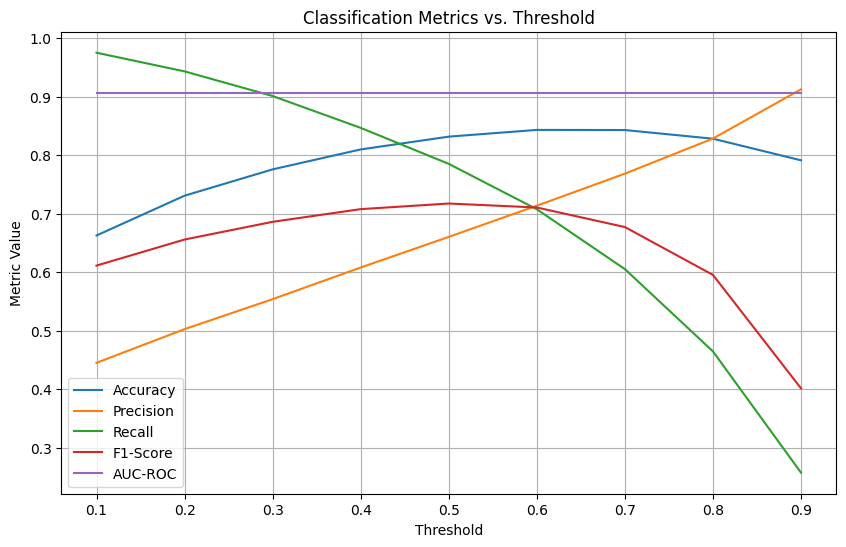

In [ ]:
plt.figure(figsize=(10, 6))

# Plot each metric against the threshold
plt.plot(metrics_df['Threshold'], metrics_df['Accuracy'], label='Accuracy')
plt.plot(metrics_df['Threshold'], metrics_df['Precision'], label='Precision')
plt.plot(metrics_df['Threshold'], metrics_df['Recall'], label='Recall')
plt.plot(metrics_df['Threshold'], metrics_df['F1-Score'], label='F1-Score')
plt.plot(metrics_df['Threshold'], metrics_df['AUC-ROC'], label='AUC-ROC')

# Add labels and legend
plt.xlabel('Threshold')
plt.ylabel('Metric Value')
plt.title('Classification Metrics vs. Threshold')
plt.legend()

plt.grid(True)
plt.show()

Añadir a distintos umbrales que resultado nos da

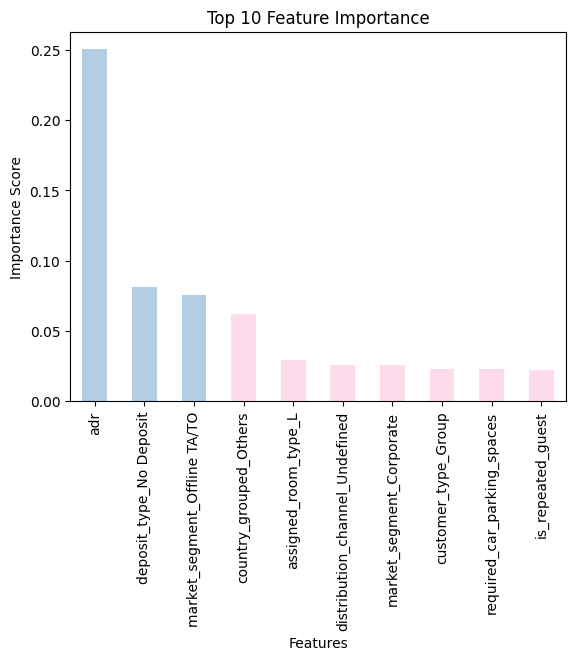

In [ ]:
# Get feature importances
importances = model_tuned.feature_importances_

# Create a Series for visualization
feature_importances = pd.Series(importances, index=df_dum.columns[:-1])  # Exclude target column

# Sort and select top 10
top_10_features = feature_importances.sort_values(ascending=False).head(10)

# Plot top 10 features
top_10_features.plot(kind='bar', color=bar_colors)
plt.xlabel('Features')
plt.title('Top 10 Feature Importance')
plt.ylabel('Importance Score')
plt.show()

Ver los features que más importan para cuando falla

Para los pasos positivos tengo que filtrar en el y_proba que sea 1 y en el y_test sea 0


In [ ]:
kf = KFold(n_splits=5, shuffle = True)
selector = RFECV(model_tuned, step = 1, cv=kf, scoring = 'f1', verbose=2)
selector.fit(X_train, y_train)

Fitting estimator with 75 features.
Fitting estimator with 74 features.
Fitting estimator with 73 features.
Fitting estimator with 72 features.
Fitting estimator with 71 features.
Fitting estimator with 70 features.
Fitting estimator with 69 features.
Fitting estimator with 68 features.
Fitting estimator with 67 features.
Fitting estimator with 66 features.
Fitting estimator with 65 features.
Fitting estimator with 64 features.
Fitting estimator with 63 features.
Fitting estimator with 62 features.
Fitting estimator with 61 features.
Fitting estimator with 60 features.
Fitting estimator with 59 features.
Fitting estimator with 58 features.
Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 fe

RFECV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
      estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interact...
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=7, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=200, n_jobs=None,
                              num_parallel_tree=None,
                              objective='binary:logistic', ...),
      importance_getter='auto', min_features_to_select=1, n_jobs=None,
      scoring='f1', step=1, verbose=2)

In [ ]:
selected_features = df_dum.drop('is_canceled', axis=1).loc[:,selector.support_]
selected_features['is_canceled'] = df_dum['is_canceled']
df_produccion= selected_features.copy()

Pipeline que irá a producción

In [ ]:
X = df.drop( 'is_canceled', axis=1)
y = df['is_canceled']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Create transformers
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create the XGBoost model
model_tuned = XGBClassifier(n_estimators=200, learning_rate=0.2, max_depth=7, scale_pos_weight=2)

# Create the final pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('rfecv', RFECV(model_tuned, step=10, cv=KFold(n_splits=5, shuffle=True), scoring='f1', verbose=2))
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the pipeline
pipeline.fit(X_train, y_train)

Fitting estimator with 58 features.
Fitting estimator with 48 features.
Fitting estimator with 38 features.
Fitting estimator with 28 features.
Fitting estimator with 18 features.
Fitting estimator with 8 features.
Fitting estimator with 58 features.
Fitting estimator with 48 features.
Fitting estimator with 38 features.
Fitting estimator with 28 features.
Fitting estimator with 18 features.
Fitting estimator with 8 features.
Fitting estimator with 58 features.
Fitting estimator with 48 features.
Fitting estimator with 38 features.
Fitting estimator with 28 features.
Fitting estimator with 18 features.
Fitting estimator with 8 features.
Fitting estimator with 58 features.
Fitting estimator with 48 features.
Fitting estimator with 38 features.
Fitting estimator with 28 features.
Fitting estimator with 18 features.
Fitting estimator with 8 features.
Fitting estimator with 58 features.
Fitting estimator with 48 features.
Fitting estimator with 38 features.
Fitting estimator with 28 featur

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['hotel', 'meal', 'market_segment', 'distribution_channel',
       'reserved_room_type', 'assigned_room_type', 'deposit_type',
       'customer_type', 'country_grouped'],
      dtype='object'))])),
                ('rfecv',
                 RFECV(cv=KFold(n_splits=5, ra...
                                               importance_type=None,
                                               interaction_constraints=None,
                                               learning_rate=0.2, max_bin=None,
                                               max_cat_threshold=None,
                                               max_cat_to_onehot=None,
                                               max_delta_step=None, max_depth=7,
                                               max_leaves=None,
                                               min_child_weight=None,
                                               missing=nan,
                                               monotone_constraints=None,
                                               multi_strategy=None,
                                               n_estimators=200, n_jobs=None,
                                               num_parallel_tree=None,
                                               random_state=None, ...),
                       scoring='f1', step=10, verbose=2))])

Cómo guardar el modelo y poder en otra notebook cargarlo



In [ ]:
import pickle

# Assuming 'my_pipeline' is your defined pipeline
with open('my_pipeline.pkl', 'wb') as file:
    pickle.dump(pipeline, file)